In [41]:
import csv
import pandas as pd
import re

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('persian.csv')

In [43]:
df.head(5)

,persian text nalysis,polarity
0,بانک مرکزی افغانستان وعده داد که قیمت دالر در ...,1.0
1,بحران اقتصادی افغانستان؛ برنامه جهانی غذا بودج...,-1.0
2,امیرخان متقی، سرپرست وزارت خارجه با طارق علی ب...,1.0
3,وزارت خارجه در یک رشته تویت نگاشته است که آقای...,1.0
4,شماری از قالین بافان و بازرگانان قالین در کشور...,-1.0


In [44]:
df.columns

Index(['persian text nalysis', 'polarity'], dtype='object')

In [45]:
df.columns = ["text", "sentiment"]

In [46]:
def clean_text(str_arg):
    
    text=re.sub('\W',' ',str_arg,flags=re.IGNORECASE) 
    text=re.sub('(\s+)',' ',text)
    #text=text.lower()
    #text= re.sub(r'@[A-Za-z0-9]+', '', text)#remove @mention
    return text

In [47]:
df.dropna(subset = ['text', 'sentiment'], inplace=True)
print(df.head(4))

                                                text  sentiment
0  بانک مرکزی افغانستان وعده داد که قیمت دالر در ...        1.0
1  بحران اقتصادی افغانستان؛ برنامه جهانی غذا بودج...       -1.0
2  امیرخان متقی، سرپرست وزارت خارجه با طارق علی ب...        1.0
3  وزارت خارجه در یک رشته تویت نگاشته است که آقای...        1.0


In [48]:
x = df.iloc[:, 0]
x = [clean_text(x) for x in x]

In [49]:
y = df.iloc[:, 1]

<AxesSubplot:xlabel='text'>

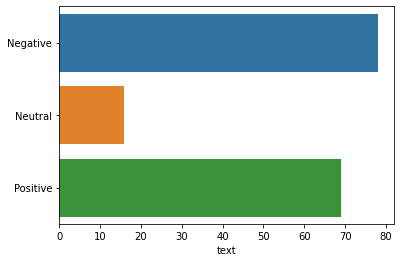

In [50]:
classes = df.groupby(['sentiment'], as_index = False).count()
classes['sentiment']
sns.barplot(x=classes['text'],y=['Negative','Neutral','Positive'],data=classes['text'])